In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

# Investigating table columns to identify dat column title
first_row_data = session.query(Measurements).first()
first_row_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23fa0a8c470>,
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01'}

In [21]:
date_inquiry = session.query(Measurements.date).\
order_by(Measurements.date.desc()).limit(1).all()

##  This can also be accomplished more succintly using the .first method:
#
#      date_inquiry = session.query(Measurements.date).\
#      order_by(Measurements.date.desc()).first()
#
##  Multiple ways to skin a cat so as the saying goes.

date_inquiry

[('2017-08-23')]

In [43]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
##   !Tutor / TA Inquiry:  There's got to be a way I can pass the result of my date_inquiry directly into
##   my code here, using a text-to-date conversion (strptime method perhaps?).
## 

data_timeframe = dt.date(2017,8,23) - dt.timedelta(days=365)
data_timeframe

# Perform a query to retrieve the data and precipitation scores
Combined_Precip_Date = session.query(Measurements.date, Measurements.prcp).\
    filter(Measurements.date >= data_timeframe).\
    order_by(Measurements.date.desc()).all()

Combined_Precip_Date

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [56]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Combined_Precip_Date_df = pd.DataFrame(Combined_Precip_Date, columns=["Date", "Precipitation"])
Combined_Precip_Date_df.set_index("Date", inplace=True)

Combined_Precip_Date_df.head()

# Sort the dataframe by date
Combined_Precip_Date_df.sort_values(by='Date', ascending=False)

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-23,0.00
2017-08-22,0.00
...,...
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


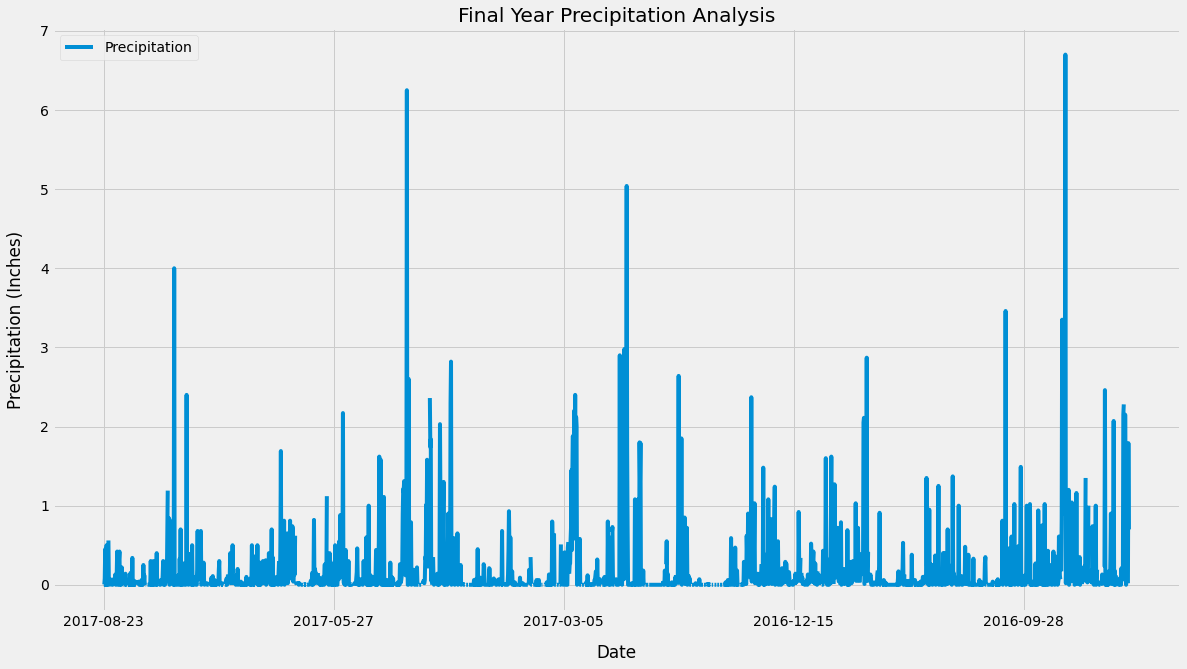

In [57]:
# Use Pandas Plotting with Matplotlib to plot the data
Combined_Precip_Date_df.plot(title="Final Year Precipitation Analysis", figsize=(18,10))
plt.ylabel("Precipitation (Inches)", labelpad=15)
plt.xlabel("Date", labelpad=15)
plt.show()

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
Combined_Precip_Date_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset

# Investigating station database
first_row_data = session.query(Station).first()
first_row_data.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23fa2515710>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [61]:
Station_Counts = session.query(Station.station).group_by(Station.station).count()
Station_Counts

9

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

Station_Activity_Counts = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()

Station_Activity_Counts


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Most_Active_Station_Metrics = session.query(Measurements.station,\
                                            func.min(Measurements.tobs),\
                                            func.max(Measurements.tobs),\
                                            func.avg(Measurements.tobs)).\
                                            filter(Measurements.station == 'USC00519281').all()
Most_Active_Station_Metrics

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [78]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

Most_Active_Station_Data = session.query(Measurements.tobs)\
    .filter(Measurements.date >= data_timeframe)\
    .filter(Measurements.station == "USC00519281")\
    .order_by(Measurements.date.desc()).all()

Most_Active_Station_df = pd.DataFrame(Most_Active_Station_Data, columns=["TOBS"])
Most_Active_Station_df.describe()
Most_Active_Station_df.head(10)

,TOBS
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
5,77.0
6,83.0
7,82.0
8,77.0
9,76.0


Text(0, 0.5, 'Frequency of Measured Value')

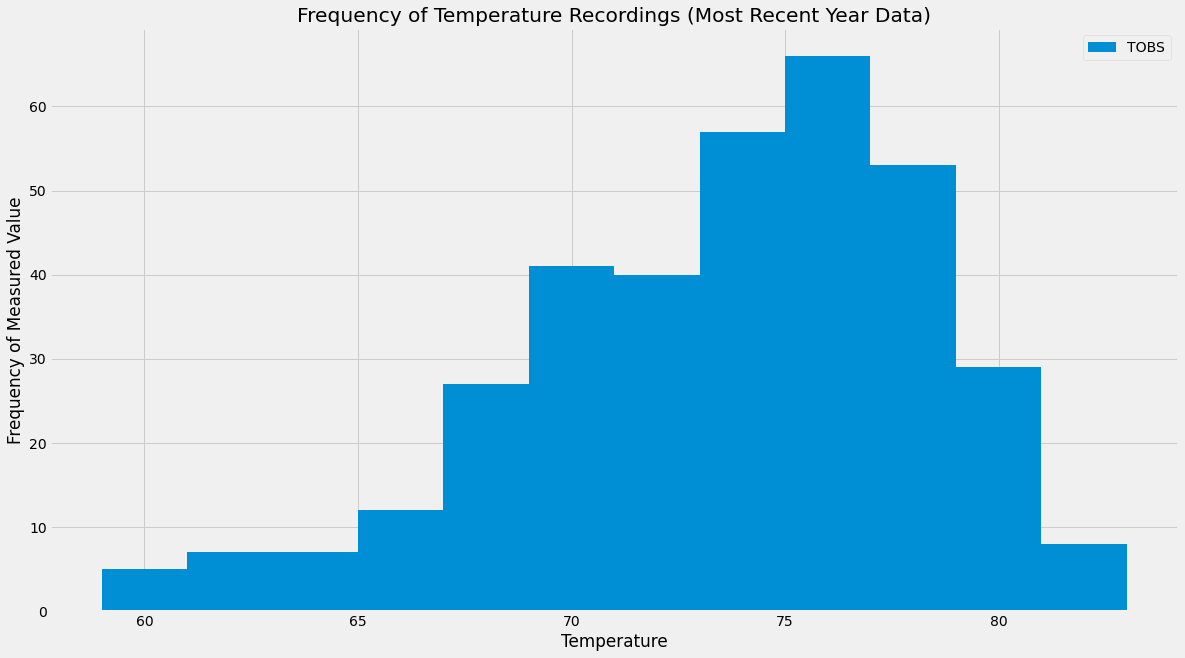

In [82]:
Most_Active_Station_df.plot.hist(bins=12, figsize=(18,10))
plt.title("Frequency of Temperature Recordings (Most Recent Year Data)")
plt.xlabel("Temperature")
plt.ylabel("Frequency of Measured Value")

# Close session

In [ ]:
# Close Session
session.close()